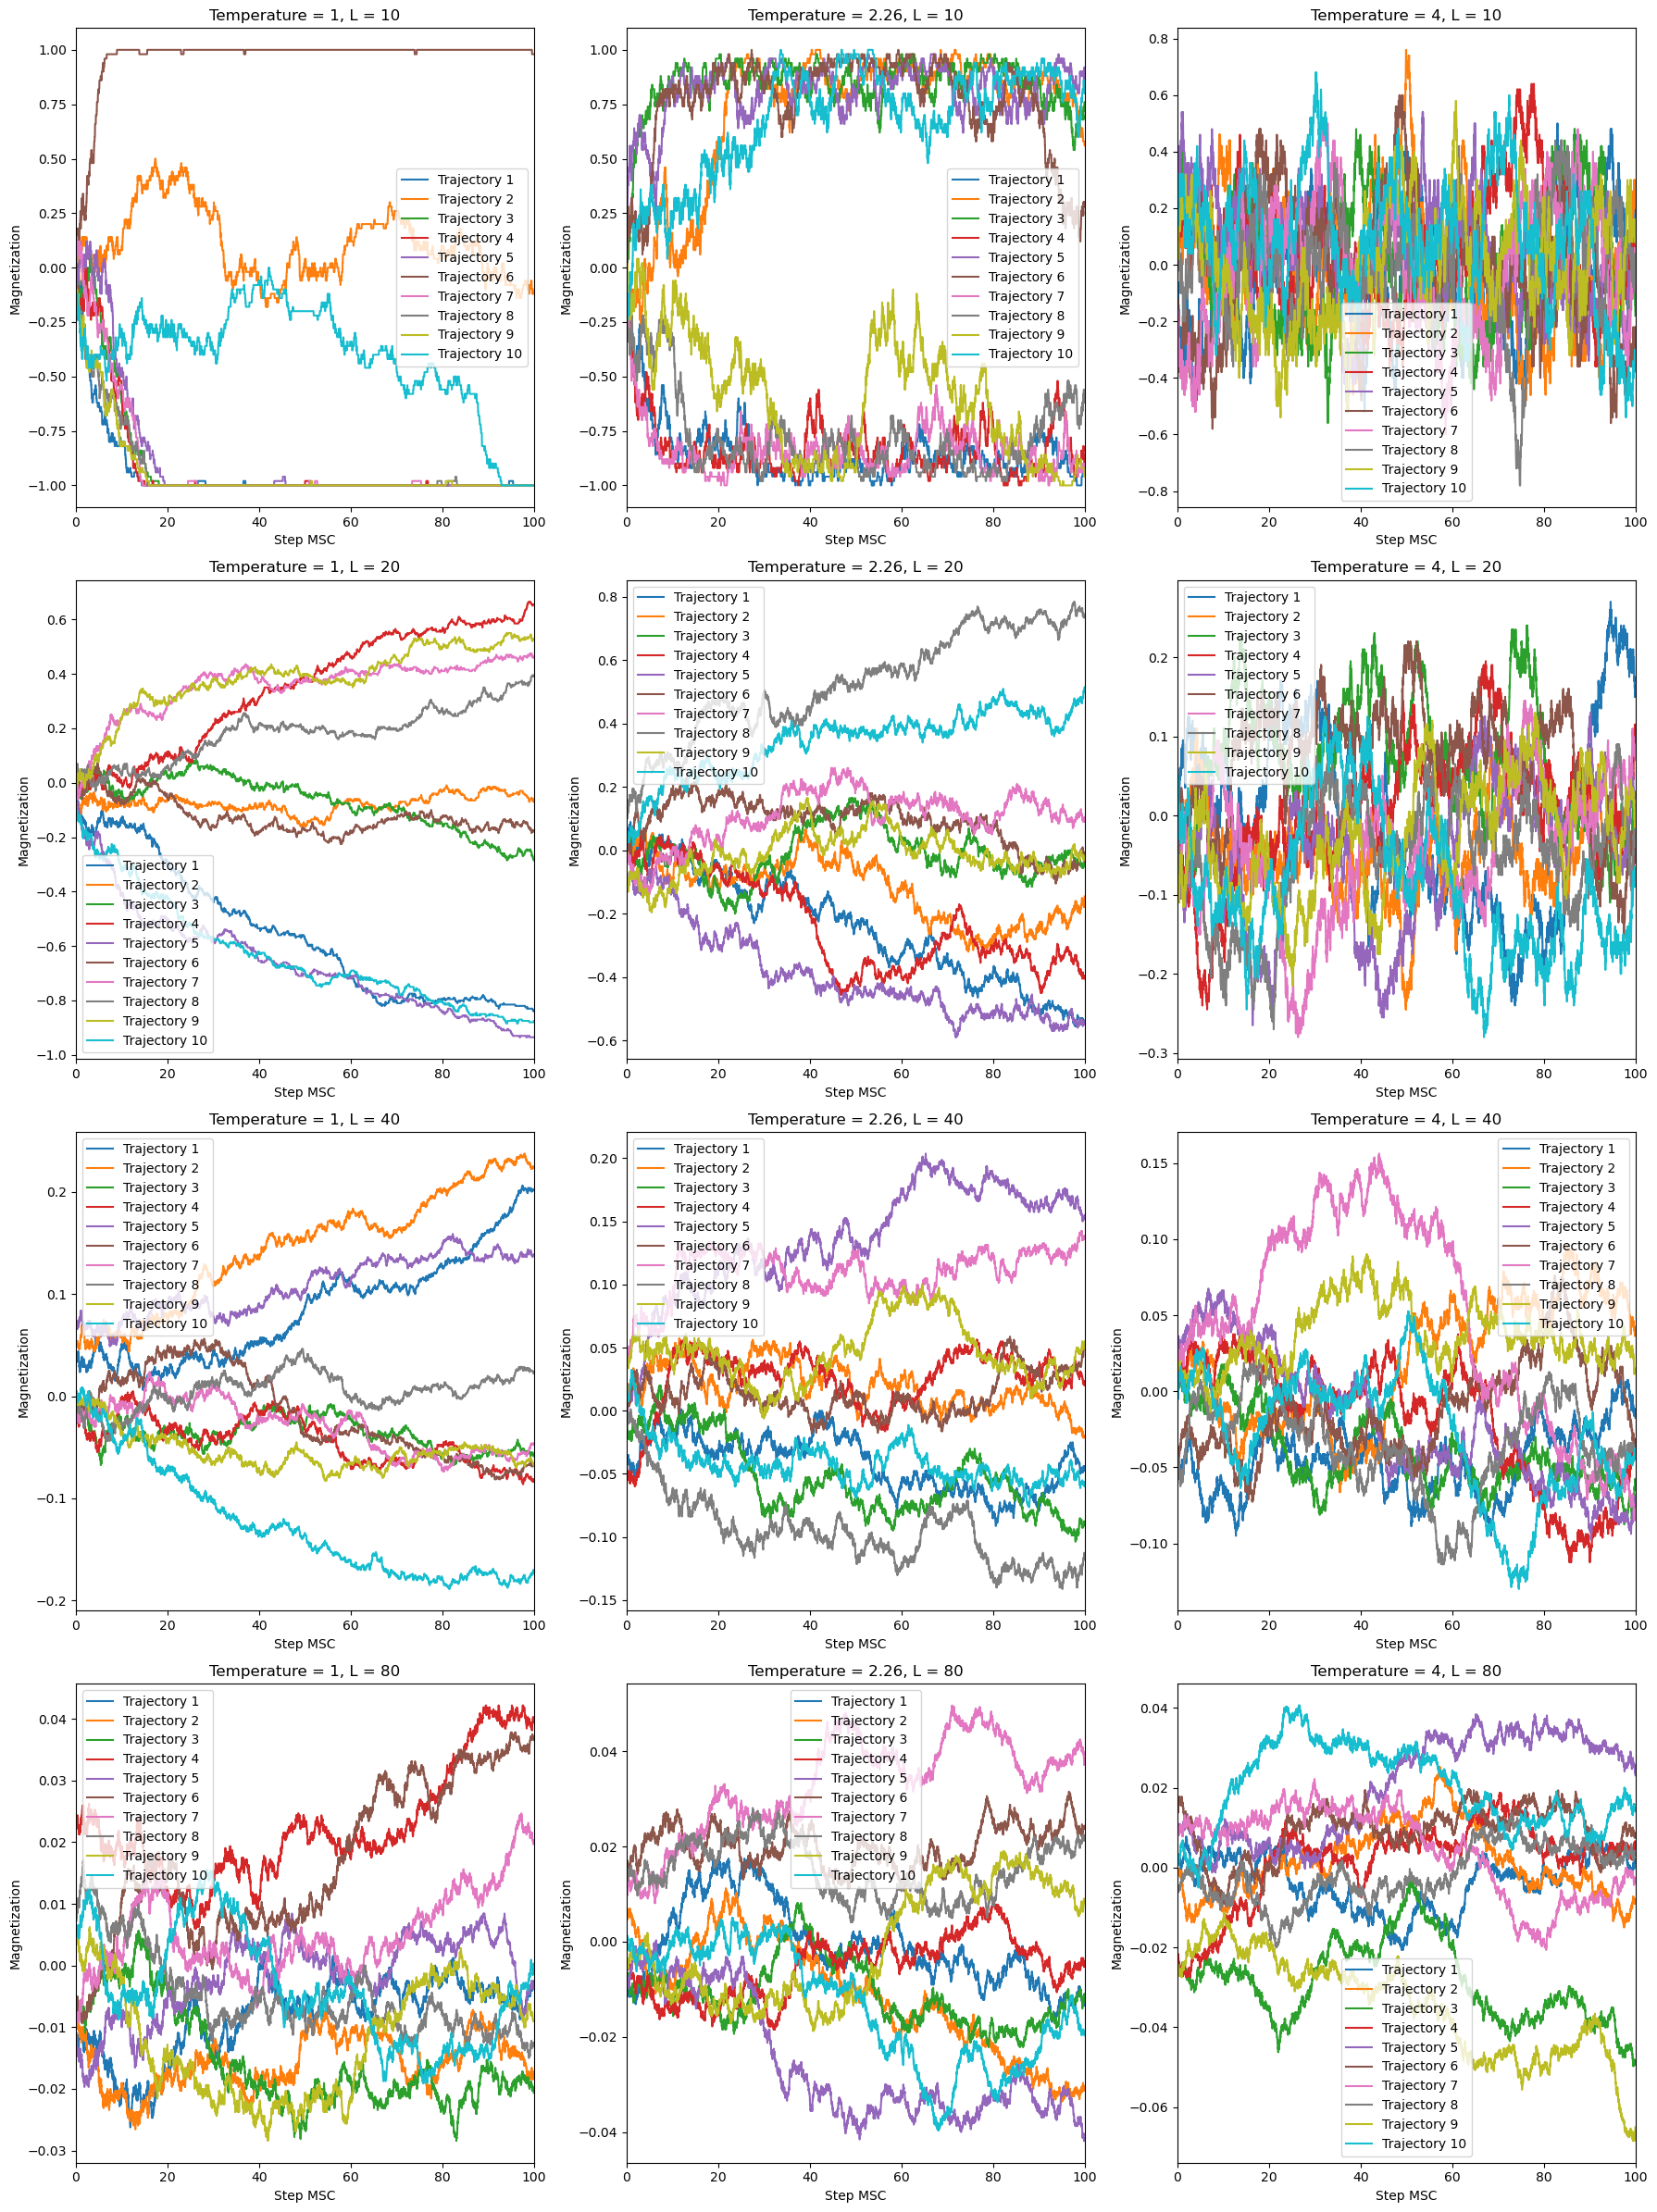

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(L, probability_of_spin_up):
    lattice = np.random.choice([-1, 1], size=(L, L), p=[1 - probability_of_spin_up, probability_of_spin_up])
    return lattice

def update(lattice, temperature):
    L = lattice.shape[0]
    i = np.random.randint(L)
    j = np.random.randint(L)
    spin = lattice[i, j]
    neighbors = lattice[(i+1)%L, j] + lattice[i-1, j] + lattice[i, (j+1)%L] + lattice[i, j-1]
    energy_diff = 2 * spin * neighbors
    if (energy_diff <= 0) or (temperature > 0 and np.random.uniform() < np.exp(-energy_diff / temperature)):
        lattice[i, j] = -spin

# Parameters
lattice_sizes = [10, 20, 40, 80]  # Lattice sizes
probability_of_spin_up = 0.5

critical_temperature = 2.26
temperatures = [1, critical_temperature, 4]

n_trajectories = 10  # Number of trajectories
steps_MCS = 100
steps_L = 100
n_steps = steps_MCS*steps_L  # Total number of steps per trajectory

# Plot figures
fig, axes = plt.subplots(len(lattice_sizes), len(temperatures), figsize=(6 * len(temperatures), 6 * len(lattice_sizes)))

for i, L in enumerate(lattice_sizes):
    for j, temperature in enumerate(temperatures):
        # Simulate
        magnetization_trajectories = []
        for k in range(n_trajectories):
            lattice = initialize_lattice(L, probability_of_spin_up)
            magnetization_values = []

            # Magnetization measurement steps
            for l in range(n_steps):
                update(lattice, temperature)
                magnetization = np.sum(lattice) / (L * L)
                magnetization_values.append(magnetization)

            magnetization_trajectories.append(magnetization_values)
            
        # Save trajectories to file
        np.savetxt(f'magnetization_trajectories_L{L}, temp{temperature}.txt', np.array(magnetization_trajectories))

        # Plot trajectories
        ax = axes[i, j]
        for k, trajectory in enumerate(magnetization_trajectories):
            ax.plot(trajectory, label=f'Trajectory {k+1}')

        ax.set_xlabel('Step MSC')
        ax.set_ylabel('Magnetization')
        ax.set_title(f'Temperature = {temperature}, L = {L}')
        ax.legend()
        ax.set_xlim(0, 10000)
    
        # Modify x-axis ticks and labels
        ticks = ax.get_xticks()
        ax.set_xticks(ticks)
        ax.set_xticklabels([int(tick/100) for tick in ticks])
        

plt.tight_layout()
plt.show()